In [1]:
import sys
sys.path.append("..")
from library import *


In [2]:
def get_circuit_results(m, taus):
    energies = np.zeros(len(taus))
    states = np.zeros(shape=(len(taus), 4), dtype=complex)
    ham = H2QCircuit.get_hamilt_op(None).to_matrix()

    for i, tau in enumerate(taus):
        h2qc = H2QCircuit(m=m, tau=tau, trot_reps=10)
        h2qc.run_simulation(num_shots=1)
        state_res = h2qc.final_state
        state_res = normalize(state_res[::2 ** (m * 2)])

        energy = get_energy(state_res, ham)
        energies[i] = energy
        states[i, :] = state_res
        print(f"Simulation {i+1} for tau={tau:.4f} done (energy={energy:.4f})!")
    
    return energies, states

In [3]:
taus = np.linspace(0, 7, 6)
M = 4
ham = H2QCircuit.get_hamilt_op(None).to_matrix()
psi0 = np.ones(4) * 0.5
energies, states = get_circuit_results(M, taus)
gs_energy, gs_state = get_ground_eigh(ham)
fids_op = np.array([get_fidelity(normalize(get_ite(ham, tau) @ psi0), gs_state) for tau in taus])
fids_alg = np.array([get_fidelity(states[i], gs_state) for i in range(len(states))])
energies_op = [0] * len(taus)
for i, tau in enumerate(taus):
    op_ite = get_ite(ham, tau)
    final = normalize(op_ite @ psi0)
    energies_op[i] = get_energy(final, ham)

Simulation 1 for tau=0.0000 done (energy=0.4342)!
Simulation 2 for tau=0.2414 done (energy=0.0309)!
Simulation 3 for tau=0.4828 done (energy=-0.3422)!
Simulation 4 for tau=0.7241 done (energy=-0.6184)!
Simulation 5 for tau=0.9655 done (energy=-0.7908)!
Simulation 6 for tau=1.2069 done (energy=-0.8879)!
Simulation 7 for tau=1.4483 done (energy=-0.9399)!
Simulation 8 for tau=1.6897 done (energy=-0.9672)!
Simulation 9 for tau=1.9310 done (energy=-0.9815)!
Simulation 10 for tau=2.1724 done (energy=-0.9891)!
Simulation 11 for tau=2.4138 done (energy=-0.9931)!
Simulation 12 for tau=2.6552 done (energy=-0.9952)!
Simulation 13 for tau=2.8966 done (energy=-0.9963)!
Simulation 14 for tau=3.1379 done (energy=-0.9969)!
Simulation 15 for tau=3.3793 done (energy=-0.9971)!
Simulation 16 for tau=3.6207 done (energy=-0.9969)!
Simulation 17 for tau=3.8621 done (energy=-0.9961)!
Simulation 18 for tau=4.1034 done (energy=-0.9945)!
Simulation 19 for tau=4.3448 done (energy=-0.9917)!
Simulation 20 for tau=4

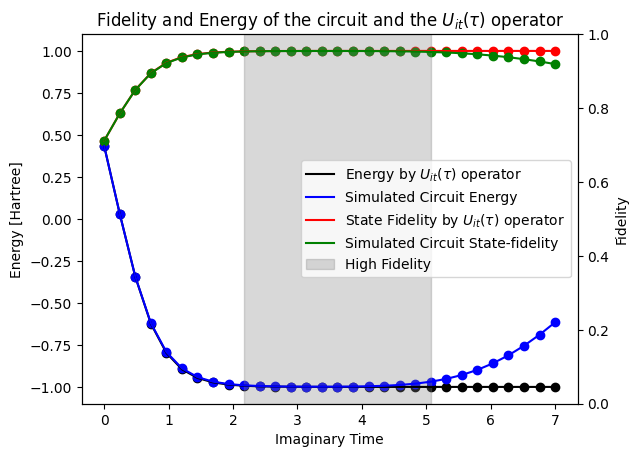

In [5]:
   
colors = ["black", "blue", "red", "green"]   
   
plt.plot(taus, energies_op, label=r"Energy by $U_{it}(\tau)$ operator", color=colors[0]);
plt.scatter(taus, energies_op, color=colors[0]);
plt.plot(taus, energies, label="Simulated Circuit Energy", color=colors[1]);
plt.scatter(taus, energies, color=colors[1]);
plt.plot(taus, np.array(fids_op), label=r"State Fidelity by $U_{it}(\tau)$ operator", color=colors[2]);
plt.scatter(taus, np.array(fids_op), color=colors[2]);
plt.plot(taus, np.array(fids_alg), label="Simulated Circuit State-fidelity", color=colors[3]);
plt.scatter(taus, np.array(fids_alg), color=colors[3]);

first_high_fid = np.where(fids_alg > 0.995)[0][0]
last_high_fid = len(fids_alg) - np.where(fids_alg[::-1] > 0.995)[0][0]
plt.axvspan(taus[first_high_fid], taus[last_high_fid], alpha=0.3, color='gray', label="High Fidelity")
plt.xlabel(r"Imaginary Time")
plt.ylabel(r"Energy [Hartree]")
plt.legend();

y2 = plt.gca().twinx()
y2.set_ylim(0, 1)
y2.set_yticks(np.arange(0, 1.1, 0.2))
y2.set_yticklabels([f"{x:.1f}" for x in np.arange(0, 1.1, 0.2)])
y2.set_ylabel("Fidelity")

plt.title(r"Fidelity and Energy of the circuit and the $U_{it}(\tau)$ operator");
